In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',None)

In [5]:
df = pd.read_csv('C:\\Users\\xzhao\\OneDrive\\Desktop\\Python_EDA\\Data\\house-prices-advanced-regression-techniques\\train.csv')
tdf = pd.read_csv('C:\\Users\\xzhao\\OneDrive\\Desktop\\Python_EDA\\Data\\house-prices-advanced-regression-techniques\\train.csv')
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

## narrow down relevant df 

In [64]:
df.shape
tdf.shape

(1460, 81)

In [65]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# num_col = df[df.info() =='int64' or df.info() == 'float64']
obj_col = df[df.info() == 'float64']
print(obj_col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

KeyError: False

In [24]:
relevant = (
    'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 
    #'Street',
       #'Alley', 'LotShape', 'LandContour', 
    'Utilities', 'LotConfig',
       #'LandSlope', 
    'Neighborhood', 
    #'Condition1', 'Condition2', 
    'BldgType',
       'HouseStyle', 'OverallQual', 
    #'OverallCond', 
    'YearBuilt', 'YearRemodAdd',
       #'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       #'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       #'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       #'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       #'HeatingQC', 'CentralAir', 'Electrical', 
    '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
    #'KitchenQual',
       #'TotRmsAbvGrd', 'Functional', 
    'Fireplaces', #'FireplaceQu', 'GarageType',
       'GarageYrBlt', #'GarageFinish', 'GarageCars', 
    'GarageArea', #'GarageQual',
       #'GarageCond', 'PavedDrive', 
    'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', #'PoolQC',
       #'Fence', 'MiscFeature', 
    'MiscVal', 'MoSold', 'YrSold', #'SaleType',
       #'SaleCondition', 
    'SalePrice')

In [66]:
relevant2 = (
    'Id', #'MSSubClass', 'MSZoning', 'LotFrontage', 
    'LotArea', 
    #'Street',
       #'Alley', 'LotShape', 'LandContour', 
    #'Utilities', 'LotConfig',
       #'LandSlope', 
    #'Neighborhood', 
    #'Condition1', 'Condition2', 
    #'BldgType',
       #'HouseStyle', 'OverallQual', 
    'OverallCond', 
    'YearBuilt', 'YearRemodAdd',
       #'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       #'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       #'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       #'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       #'HeatingQC', 'CentralAir', 'Electrical', 
    #'1stFlrSF', '2ndFlrSF',
       #'LowQualFinSF', 
    'GrLivArea', 
    #'BsmtFullBath', 'BsmtHalfBath', 
    'FullBath',
       #'HalfBath', 
    'BedroomAbvGr', 'KitchenAbvGr', 
    #'KitchenQual',
       #'TotRmsAbvGrd', 'Functional', 
    'Fireplaces', #'FireplaceQu', 'GarageType',
       #'GarageYrBlt', #'GarageFinish', 'GarageCars', 
    'GarageArea', #'GarageQual',
       #'GarageCond', 'PavedDrive', 
    'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', #'PoolQC',
       #'Fence', 'MiscFeature', 
    'MiscVal', 'MoSold', 'YrSold', #'SaleType',
       #'SaleCondition', 
    'SalePrice')

In [30]:
int_cols = df.select_dtypes(include=['int']).columns
int_cols
#int_cols_new = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [56]:
cm = df[int_cols].corr()

In [59]:
cm['sum']=cm.sum(axis=1) -1

In [60]:
cm['sum']

Id              -0.071674
MSSubClass      -0.219003
LotArea          3.070313
OverallQual      7.698934
OverallCond     -1.470529
YearBuilt        4.241522
YearRemodAdd     4.828318
BsmtFinSF1       3.387885
BsmtFinSF2      -0.009843
BsmtUnfSF        1.555878
TotalBsmtSF      6.500241
1stFlrSF         6.654978
2ndFlrSF         4.316164
LowQualFinSF    -0.076853
GrLivArea        9.133325
BsmtFullBath     1.771795
BsmtHalfBath    -0.142461
FullBath         6.732518
HalfBath         3.347483
BedroomAbvGr     3.567746
KitchenAbvGr    -0.281867
TotRmsAbvGrd     7.324391
Fireplaces       5.202753
GarageCars       6.710546
GarageArea       6.641271
WoodDeckSF       3.386427
OpenPorchSF      3.818473
EnclosedPorch   -1.667069
3SsnPorch        0.234624
ScreenPorch      1.102056
PoolArea         1.672415
MiscVal         -0.016266
MoSold           0.477510
YrSold          -0.498339
SalePrice        8.820366
Name: sum, dtype: float64

In [50]:
cms = cm.sort_value('sum', ascending=False)

AttributeError: 'DataFrame' object has no attribute 'sort_value'

In [67]:
df2 = df.loc[:,relevant2]
df2
tdf2 = tdf.loc[:,relevant2]
tdf2

,Id,LotArea,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,8450,5,2003,2003,1710,2,3,1,0,548,0,61,0,0,0,0,0,2,2008,208500
1,2,9600,8,1976,1976,1262,2,3,1,1,460,298,0,0,0,0,0,0,5,2007,181500
2,3,11250,5,2001,2002,1786,2,3,1,1,608,0,42,0,0,0,0,0,9,2008,223500
3,4,9550,5,1915,1970,1717,1,3,1,1,642,0,35,272,0,0,0,0,2,2006,140000
4,5,14260,5,2000,2000,2198,2,4,1,1,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,5,1999,2000,1647,2,3,1,1,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,13175,6,1978,1988,2073,2,3,1,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,9042,9,1941,2006,2340,2,4,1,2,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,9717,6,1950,1996,1078,1,2,1,0,240,366,0,112,0,0,0,0,4,2010,142125


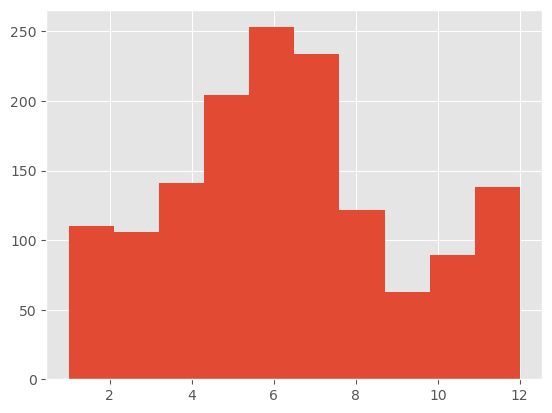

In [68]:
df2['MoSold'].hist()
plt.show()

In [69]:
df2.dtypes
tdf2.dtypes


Id               int64
LotArea          int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
GrLivArea        int64
FullBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
Fireplaces       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [70]:
df2['Deckporch'] = df2['WoodDeckSF']+df2['OpenPorchSF']+df2['EnclosedPorch']+df2['3SsnPorch']+df2['ScreenPorch']
tdf2['Deckporch'] = tdf2['WoodDeckSF']+tdf2['OpenPorchSF']+tdf2['EnclosedPorch']+tdf2['3SsnPorch']+tdf2['ScreenPorch']

In [71]:
df2 # combine dech and porch
tdf2 = tdf2.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1)
tdf2 # combine dech and porch

,Id,LotArea,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Deckporch
0,1,8450,5,2003,2003,1710,2,3,1,0,548,0,0,2,2008,208500,61
1,2,9600,8,1976,1976,1262,2,3,1,1,460,0,0,5,2007,181500,298
2,3,11250,5,2001,2002,1786,2,3,1,1,608,0,0,9,2008,223500,42
3,4,9550,5,1915,1970,1717,1,3,1,1,642,0,0,2,2006,140000,307
4,5,14260,5,2000,2000,2198,2,4,1,1,836,0,0,12,2008,250000,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,5,1999,2000,1647,2,3,1,1,460,0,0,8,2007,175000,40
1456,1457,13175,6,1978,1988,2073,2,3,1,2,500,0,0,2,2010,210000,349
1457,1458,9042,9,1941,2006,2340,2,4,1,2,252,0,2500,5,2010,266500,60
1458,1459,9717,6,1950,1996,1078,1,2,1,0,240,0,0,4,2010,142125,478


In [72]:
#combine year built,modified and sold
df2['LastRM'] =  df2['YrSold']-df2['YearRemodAdd']
df2 = df2.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis=1)
tdf2['LastRM'] =  tdf2['YrSold']-tdf2['YearRemodAdd']
tdf2 = tdf2.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis=1)

In [12]:
tdf2

,Id,LotArea,OverallCond,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,PoolArea,MiscVal,MoSold,SalePrice,Deckporch,LastRM
0,1,8450,5,1710,2,3,1,0,548,0,0,2,208500,61,5
1,2,9600,8,1262,2,3,1,1,460,0,0,5,181500,298,31
2,3,11250,5,1786,2,3,1,1,608,0,0,9,223500,42,6
3,4,9550,5,1717,1,3,1,1,642,0,0,2,140000,307,36
4,5,14260,5,2198,2,4,1,1,836,0,0,12,250000,276,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,5,1647,2,3,1,1,460,0,0,8,175000,40,7
1456,1457,13175,6,2073,2,3,1,2,500,0,0,2,210000,349,22
1457,1458,9042,9,2340,2,4,1,2,252,0,2500,5,266500,60,4
1458,1459,9717,6,1078,1,2,1,0,240,0,0,4,142125,478,14


## standardize the columns

In [73]:
tdf2

,Id,LotArea,OverallCond,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,PoolArea,MiscVal,MoSold,SalePrice,Deckporch,LastRM
0,1,8450,5,1710,2,3,1,0,548,0,0,2,208500,61,5
1,2,9600,8,1262,2,3,1,1,460,0,0,5,181500,298,31
2,3,11250,5,1786,2,3,1,1,608,0,0,9,223500,42,6
3,4,9550,5,1717,1,3,1,1,642,0,0,2,140000,307,36
4,5,14260,5,2198,2,4,1,1,836,0,0,12,250000,276,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,5,1647,2,3,1,1,460,0,0,8,175000,40,7
1456,1457,13175,6,2073,2,3,1,2,500,0,0,2,210000,349,22
1457,1458,9042,9,2340,2,4,1,2,252,0,2500,5,266500,60,4
1458,1459,9717,6,1078,1,2,1,0,240,0,0,4,142125,478,14


In [110]:
# df2_id = df2['Id']
# df2_mv = df2['MiscVal']
# df2_mothsold = df2['MoSold']
# df2_price = df2['SalePrice'] 
#id, miscval, sale price need to be retained 
#no need to save those columns in seperate array, since the original df is not over wirtten, one can refer back the original

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
df2_scaled = pd.DataFrame(scaler.fit_transform(df2),columns=df2.columns)
tdf2_scaled = pd.DataFrame(scaler.fit_transform(df2),columns=df2.columns)

In [77]:
df2_scaled['Id'] = df2['Id'].copy()
df2_scaled['MoSold'] = df2['MoSold'].copy()
df2_scaled['SalePrice'] = df2['SalePrice'].copy()

tdf2_scaled['Id'] = tdf2['Id'].copy()
tdf2_scaled['MoSold'] = tdf2['MoSold'].copy()
tdf2_scaled['SalePrice'] = tdf2['SalePrice'].copy()

In [78]:
df2_scaled

df2_scaled


,Id,LotArea,OverallCond,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Deckporch,LastRM
0,1,-0.207142,-0.517200,0.370333,0.789741,0.163779,-0.211454,-0.951226,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2,208500,-0.768375,-0.869941
1,2,-0.091886,2.179628,-0.482512,0.789741,0.163779,-0.211454,0.600495,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,5,181500,0.745011,0.390141
2,3,0.073480,-0.517200,0.515013,0.789741,0.163779,-0.211454,0.600495,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,9,223500,-0.889702,-0.821476
3,4,-0.096897,-0.517200,0.383659,-1.026041,0.163779,-0.211454,0.600495,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,2,140000,0.802481,0.632464
4,5,0.375148,-0.517200,1.299326,0.789741,1.390023,-0.211454,0.600495,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,12,250000,0.604528,-0.724547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,-0.260560,-0.517200,0.250402,0.789741,0.163779,-0.211454,0.600495,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,8,175000,-0.902473,-0.773012
1456,1457,0.266407,0.381743,1.061367,0.789741,0.163779,-0.211454,2.152216,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2,210000,1.070676,-0.046041
1457,1458,-0.147810,3.078570,1.569647,0.789741,1.390023,-0.211454,2.152216,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,5,266500,-0.774761,-0.918406
1458,1459,-0.080160,0.381743,-0.832788,-1.026041,-1.062465,-0.211454,-0.951226,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,4,142125,1.894418,-0.433759


In [79]:
y = df2_scaled['SalePrice'].values
del df2_scaled['SalePrice']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df2_scaled, y, test_size=0.3, random_state=1236)

In [81]:
print(y_train.mean(),y_valid.mean())

180633.85616438356 181591.65525114155


In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [83]:
y_train_hat = model.predict(X_train)
y_valid_hat = model.predict(X_valid)

In [84]:
# from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [85]:
#  accuracy_score(y_train,y_train_hat)
# accuracy_score(y_valid,y_valid_hat)
print(mean_squared_log_error(y_train,y_train_hat))
print(mean_squared_log_error(y_valid,y_valid_hat))

0.045544944615385496
0.045031775445313275


In [86]:
print(mean_squared_error(y_train,y_train_hat))
print(mean_squared_error(y_valid,y_valid_hat))

1736165323.2736492
1895445626.7189856


In [87]:
print(median_absolute_error(y_train,y_train_hat))
print(median_absolute_error(y_valid,y_valid_hat))

20885.566557804144
20087.82287886298


In [88]:
y.mean()

180921.19589041095

In [89]:
# it seems as long as you spell it out, the target column does not need to be excluded from the tdf
y_test = tdf2_scaled['SalePrice']
del tdf2_scaled['SalePrice']
X_test = tdf2_scaled.copy() #.drop('SalePrice',axis=1)

In [90]:
y_test_hat = model.predict(X_test)

In [91]:
print(mean_squared_error(y_test,y_test_hat))
print(median_absolute_error(y_test,y_test_hat))

1783949414.30725
20663.20936061936


In [92]:

coef = pd.DataFrame({
    'feature': X_test.columns,
    'coef': model.coef_
    })

coef_sorted_1236 = coef.sort_values(by='coef',ascending=False)

coef_sorted_1236


,feature,coef
3,GrLivArea,39611.215237
8,GarageArea,18630.644549
7,Fireplaces,7595.933106
4,FullBath,6686.531744
9,WoodDeckSF,3990.283397
17,Deckporch,2264.670921
1,LotArea,2033.155308
13,ScreenPorch,852.402269
16,MoSold,674.445485
10,OpenPorchSF,423.921247


### 
1. Introduction: please include:

What is the purpose of project?
To predict sales price of property

Why do you select this project?
Enough feature to work with inside of this df

What kind of ML model are you going to use and why?
It has to be a linear regression model becasue the target's property - continuous numerical

2. Data Exploration

How many columns and rows in the data, and what are the features you are interested in?
(1460, 81), given the LR model, Im interested in continuous numerical features (number used as codes are not relevant)

Getting unique data of each columns

3. Understanding Data with Python Data Visualization packages
filter out features that are non-numerical, 2 approach:
a)include all features, eliminate as you check the metrics, strike a balance between performance and accuracy
b)adding features to domain knowledge oriented baseline, check correlation of each addtional feature agains the baseline
c)new feature creation eg. combine those can be combined
d)standardize most feature except month(for seasonality hypothesis test),sales price and misval(for its's the target or hypothesized to be one to one correlated),id(for it should have zero impact on target)

4. Splitting of data

5. Regression analysis

6. Model optimization
train/valid/test perform well and reliable enough

7. Conclusions
see coef_sorted table, some unexpect insight, subject  to re-runs
(for failure to exclude Id, e-15 is my base line for zero impact for this model)
a)additional features, even can clearly priced, has no effect on the final sales price(truth or fact of standardization?)
b)very weak e-13 seasonality, the latter in the year, the lower the price (this e-13 may be not comparable to e-15 becasue month is not standardized)
c)some seemingly correlated feature are not, need to resplit to eliminate that error

8. What did you learn from this project, and what problems did you solve during the project?
it's a recursive process
understand the problem > hypothsizing = interperate the prediction/coefficient > training the model

9. Given additional time, what improvement can be made
a)re-run with different split, maybe feature selection to see the coef change
b)PCA vs feature by feature selection, prediction vs interperatation
c)find outlier
d)try tree based model
e)encoding 0/1, onehot, target(kfold, randomrized encoding)
f)data leakage(including target as a feature by accident), what if it's necessary

In [33]:
import os
current_path = os.getcwd()
print(current_path)

C:\Users\xzhao


# Feature understanding and pre-trainning
## handle missing value
## handle obvious wrong values
## check correlation and distribution